# ATLAS Samples

## Import modules

In [19]:
from dataset import H5Dataset
from helpers import plot_mass, find_indices, find_sample_number

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load samples

Have both lephad decays and hadhad decays available 

In [35]:
region = "HadHad"
dname = f"ProjectSamples/{region}"
#dname = f"/bundle/data/ATLAS/gwilliam/ProjectSamples/h5/ATLAS/{region}"
samples = [f"{dname}/hadhad_V5.h5", f"{dname}/ttbar_nonallhad_V5.h5", f"{dname}/zjets_V5.h5", f"{dname}/ttbar_dilep_V5.h5"]
data = H5Dataset(samples, target_name = "Mtautau") #, size = 25000)

Loading 86932 entries ProjectSamples/HadHad/hadhad_V5.h5
Loading 31994 entries ProjectSamples/HadHad/ttbar_nonallhad_V5.h5
Loading 280648 entries ProjectSamples/HadHad/zjets_V5.h5
Loading 81248 entries ProjectSamples/HadHad/ttbar_dilep_V5.h5


### Explore dataset

List of input feature names

In [21]:
print(data.feature_names)

['Tau1_Pt', 'Tau1_Eta', 'Tau1_Phi', 'Tau1_E', 'Tau2_Pt', 'Tau2_Eta', 'Tau2_Phi', 'Tau2_E', 'Bjet1_Pt', 'Bjet1_Eta', 'Bjet1_Phi', 'Bjet1_E', 'Bjet2_Pt', 'Bjet2_Eta', 'Bjet2_Phi', 'Bjet2_E', 'MET_MET', 'MET_Phi', 'MET_SumET', 'NJets']


Input data

In [22]:
X = data.X()
print(X.shape)
X

(480822, 20)


array([[ 2.24822678e+02, -6.72823966e-01, -1.51589024e+00, ...,
        -1.18863153e+00,  1.15153064e+03,  4.00000000e+00],
       [ 9.86167908e+01,  1.28500843e+00, -2.01964712e+00, ...,
        -1.51926553e+00,  4.31483887e+02,  2.00000000e+00],
       [ 4.70283470e+01, -6.87290490e-01, -2.37626624e+00, ...,
        -3.03570342e+00,  5.64131653e+02,  6.00000000e+00],
       ...,
       [ 4.04624710e+01,  9.58820939e-01,  8.94063711e-01, ...,
         3.44716519e-01,  2.97875610e+02,  4.00000000e+00],
       [ 1.89073532e+02, -2.34623790e+00,  2.73731565e+00, ...,
         8.89388919e-01,  4.83747803e+02,  3.00000000e+00],
       [ 2.39914734e+02, -1.15706146e+00,  2.55982429e-01, ...,
        -1.73083532e+00,  7.10877991e+02,  2.00000000e+00]])

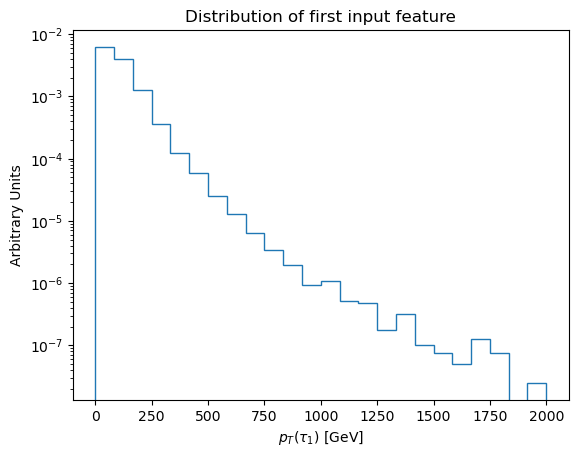

In [24]:
itau1pt = data.feature_names.index("Tau1_Pt")

plt.figure()
plt.title("Distribution of first input feature")
plt.xlabel(r"$p_T (\tau_1)$ [GeV]")
plt.ylabel("Arbitrary Units")
plt.hist(X[:, itau1pt], bins = np.linspace(0, 2000, 25), fill = None, 
         histtype = "step", density = True)
plt.yscale('log')
plt.show()

Output target mass for all samples

In [25]:
y = data.y()
print (y.shape)
y

(480822, 1)


array([[124.9999408 ],
       [124.99998658],
       [125.00000359],
       ...,
       [278.02847386],
       [334.80991737],
       [317.35723374]])

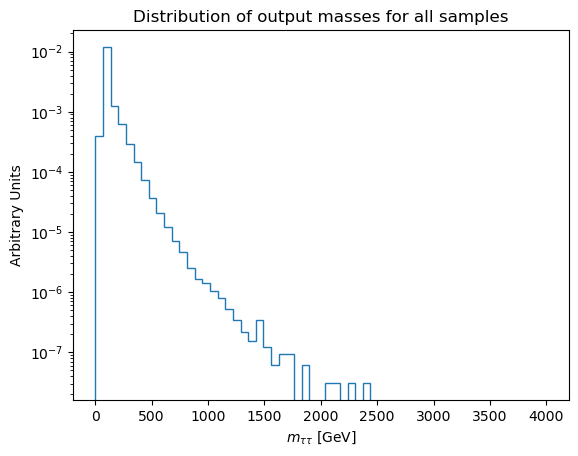

In [28]:
plt.figure()
plt.title("Distribution of output masses for all samples")
plt.xlabel(r"$m_{\tau\tau}$ [GeV]")
plt.ylabel("Arbitrary Units")
plt.hist(y, bins = np.linspace(0, 4000, 60), fill = None, 
         histtype = "step", density = True)
plt.yscale('log')
plt.show()

Auxilary data, including a label for the individual samples and the ATLAS MMC and CMS SVFIt to compare to 

In [29]:
print(data.aux_labels())
immc = data.aux_labels().index("MMMC")
immcstat = data.aux_labels().index("MMCStatus")
isample = data.aux_labels().index("sample")
aux = data.aux()
aux

['MMCStatus', 'sample', 'MMMC']


array([[  1.        ,   0.        , 111.18852997],
       [  1.        ,   0.        , 125.54810333],
       [  1.        ,   0.        , 127.4974823 ],
       ...,
       [  1.        ,   3.        , 188.90063477],
       [  1.        ,   3.        , 377.65155029],
       [  1.        ,   3.        , 367.49346924]])

Plot the ATLAS and CMS masses versus the truth for one mass sample

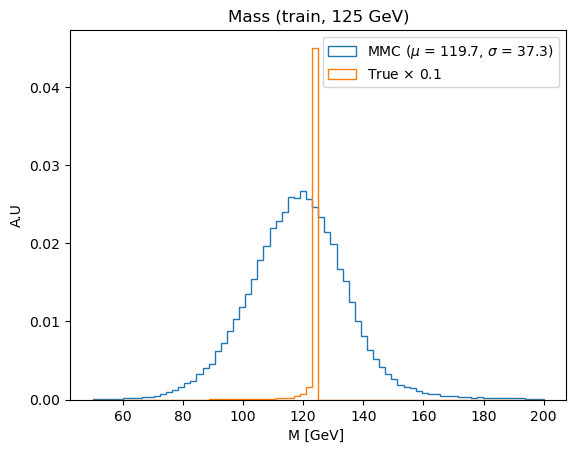

In [32]:
ihh = find_indices(samples, aux, data.aux_labels(), "hadhad")

plot_mass(None, aux[ihh, immc], mtrue=y[ihh], 
          title = "Mass (train, 125 GeV)", bins=np.linspace(50, 200, 75), true_scale = 0.1)

### Get individual data events
Data for first event

In [33]:
X0, y0 = data[0]
print(X0)
print(y0)

tensor([ 2.2482e+02, -6.7282e-01, -1.5159e+00,  2.7766e+02,  5.4114e+01,
        -6.6704e-01, -6.8727e-01,  6.6606e+01,  2.4123e+02,  1.6125e-01,
        -2.4873e+00,  2.4593e+02,  5.8751e+01, -2.6234e-03, -1.5253e+00,
         5.9340e+01,  7.2690e+01, -1.1886e+00,  1.1515e+03,  4.0000e+00])
tensor([124.9999])
